# LOAD colocalisations in datasets
- use box.build_dataset
- gathers all month colocalistions types/year labelled in cstes.labels
- 

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyproj
from rasterio.transform import Affine



import matplotlib.pyplot as plt
import matplotlib.colors as cl

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo
crs = ccrs.PlateCarree()
import cmocean.cm as cm

from xgcm import Grid
from xhistogram.xarray import histogram
import warnings
warnings.filterwarnings("ignore")

import os
from glob import glob

import histlib.box as box
#import m2lib22.aviso as aviso
#import m2lib22.cstes as cstes
#import m2lib22.diagnosis as diag

from histlib.cstes import labels, zarr_dir
from dask.distributed import Client
from dask_jobqueue import PBSCluster
from dask.distributed import wait

/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(
/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(


In [2]:
nc_files = {l: box.load_collocalisations(int(l.split('_')[-1]), drifter=l.split('_')[0], product_type=l.split('_')[1], satellite=l.split('_')[2], ) for l in labels}
nc_files

{'argos_Jason-3_2020': ['/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200101_CMEMS-L3-SLA-Jason-3__argos.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200201_CMEMS-L3-SLA-Jason-3__argos.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200301_CMEMS-L3-SLA-Jason-3__argos.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200401_CMEMS-L3-SLA-Jason-3__argos.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200501_CMEMS-L3-SLA-Jason-3__argos.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200601_CMEMS-L3-SLA-Jason-3__argos.nc'],
 'gps_SARAL_2020': ['/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200101_CMEMS-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/20200201_CMEMS-L3-SLA-SARAL__

In [21]:
for l in labels:
    print(l)
    for nc in nc_files[l]:
        ds = xr.open_dataset(nc)
        print(ds.dims)

gps_Jason-3_2020
Frozen({'obs': 15700, 'site_obs': 1489})
Frozen({'obs': 9306, 'site_obs': 1489})
Frozen({'obs': 17499, 'site_obs': 1489})
Frozen({'obs': 568, 'site_obs': 866})
argos_Jason-3_2020
Frozen({'obs': 33, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 9, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 15, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 15, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 12, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 5, 'site_obs': 1307, 'cmems_time': 211})
gps_SARAL_2020
Frozen({'obs': 11807, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 14440, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 16397, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 270, 'site_obs': 840, 'cmems_time': 211})
argos_SARAL_2020
Frozen({'obs': 26, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 17, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 22, 'site_obs': 1489, 'cmems_time': 211})
Frozen({'obs': 9, 'site_

In [4]:
# PB in Jason-gps
list_pb = []
for l in nc_files:
    for i in nc_files[l] :
        ds = xr.open_dataset(i)
        if len(ds.variables)!=51:
            list_pb.append(i)
            print(i)


KeyboardInterrupt



In [3]:
#dask
cluster = PBSCluster(cores=3, processes=3, walltime='04:00:00')
w = cluster.scale(jobs=6)
client = Client(cluster)

In [ ]:
l = "argos_Jason-2_2011"#labels[0]
#task
L = [box.build_dataset(nc_files[l][i], persist=True) for i in range(len(nc_files[l]))]
ds = (xr.concat(L, "obs")
      .assign_attrs(__time_coverage_end=xr.open_dataset(nc_files[l][-1]).attrs['__time_coverage_end'])
      .drop_vars('site_obs')
      .chunk(dict(obs=500))
     )
#store
zarr = os.path.join(zarr_dir, l+".zarr")
ds.to_zarr(zarr, mode="w")
print(f"{l} storred in {zarr}")

alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°
alti_lon from 0-360° to -180-180°


In [6]:
cluster.close()

________
# Check open

In [15]:
ds_data = xr.open_zarr(zarr_dir+'/'+labels[0]+'.zarr')

In [18]:
ds0 = ds_data.isel(obs=0)

In [23]:
ds0

<xarray.Dataset>
Dimensions:                                       (alti_time: 211,
                                                   alti_time_mid: 210,
                                                   box_y: 80, box_x: 120,
                                                   site_obs: 1489)
Coordinates: (12/19)
    alti_lat                                      (alti_time) float64 dask.array<chunksize=(211,), meta=np.ndarray>
    alti_lon                                      (alti_time) float64 dask.array<chunksize=(211,), meta=np.ndarray>
  * alti_time                                     (alti_time) int64 0 1 ... 210
    alti_time_                                    (alti_time) datetime64[ns] dask.array<chunksize=(211,), meta=np.ndarray>
  * alti_time_mid                                 (alti_time_mid) float64 0.5...
    alti_x                                        (alti_time) float64 dask.array<chunksize=(211,), meta=np.ndarray>
    ...                                            ...
    drifter_time                                  (site_obs) datetime64[ns] dask.array<chunksize=(745,), meta=np.ndarray>
    drifter_x                                     (site_obs) float64 dask.array<chunksize=(1489,), meta=np.ndarray>
    drifter_y                                     (site_obs) float64 dask.array<chunksize=(1489,), meta=np.ndarray>
    lat                                           float64 dask.array<chunksize=(), meta=np.ndarray>
    lon                                           float64 dask.array<chunksize=(), meta=np.ndarray>
    time                                          datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
Dimensions without coordinates: site_obs
Data variables: (12/68)
    __site_id                                     object dask.array<chunksize=(), meta=np.ndarray>
    __site_matchup_indice                         int32 dask.array<chunksize=(), meta=np.ndarray>
    __site_name                                   object dask.array<chunksize=(), meta=np.ndarray>
    alti___distance                               float64 dask.array<chunksize=(), meta=np.ndarray>
    alti___source                                 object dask.array<chunksize=(), meta=np.ndarray>
    alti___source_center_index                    object dask.array<chunksize=(), meta=np.ndarray>
    ...                                            ...
    drifter_typedeath                             (site_obs) float64 dask.array<chunksize=(1489,), meta=np.ndarray>
    drifter_ve                                    (site_obs) float32 dask.array<chunksize=(1489,), meta=np.ndarray>
    drifter_vn                                    (site_obs) float32 dask.array<chunksize=(1489,), meta=np.ndarray>
    drifter_vx                                    (site_obs) float64 dask.array<chunksize=(1489,), meta=np.ndarray>
    drifter_vy                                    (site_obs) float64 dask.array<chunksize=(1489,), meta=np.ndarray>
    f                                             float64 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    __id:                   CMEMS-L3-SLA-Jason-3__argos
    __time_coverage_end:    2020-07-01T00:00:00
    __time_coverage_start:  2020-01-01T00:00:00

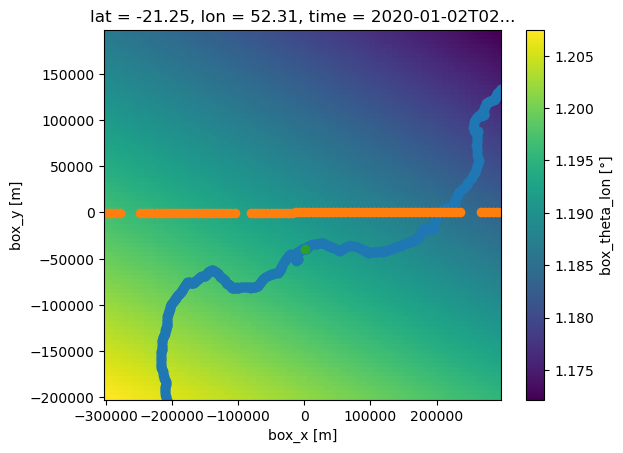

In [24]:
ds0.box_theta_lon.plot()
plt.scatter(ds0.drifter_x, ds0.drifter_y)
plt.scatter(ds0.alti_x, ds0.alti_y)
plt.scatter(ds0.drifter_x.isel(site_obs =int(ds0.__site_matchup_indice)) , ds0.drifter_y.isel(site_obs =int(ds0.__site_matchup_indice)))

In [14]:
cluster.close()